# Tutorial: The Wisdom of the Crowd: An Introduction to Ensemble Learning

Sejauh ini, kita telah fokus pada pelatihan satu model tunggal (seperti Regresi Linear atau satu Decision Tree) untuk membuat prediksi. Di chapter ini, kita akan menjelajahi ide yang sangat kuat dan berbeda: **Bagaimana jika, alih-alih mengandalkan satu "ahli", kita menggabungkan prediksi dari sekelompok besar model "non-ahli"?**

Inilah inti dari **Ensemble Learning**. Teknik ini adalah salah satu yang paling kuat dalam *machine learning* dan seringkali menjadi pemenang dalam berbagai kompetisi data.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan filosofi di balik *ensemble methods* menggunakan analogi "kebijaksanaan orang banyak".
* Memahami mengapa menggabungkan banyak model "lemah" bisa lebih baik daripada satu model yang kompleks.
* Mengidentifikasi dua keluarga utama dari *ensemble methods*: **Bagging** (paralel) dan **Boosting** (sekuensial).


---
### 2. Kelemahan Satu "Ahli"

Di chapter sebelumnya, kita melihat bahwa satu Decision Tree yang dalam (kompleks) sangat rentan terhadap **overfitting**. Ia bisa sangat tidak stabil; perubahan kecil pada data pelatihan dapat menghasilkan struktur pohon yang sangat berbeda.

**Analogi:** Bayangkan Anda meminta satu orang ahli keuangan untuk memprediksi pasar saham. Dia mungkin sangat pintar, tetapi prediksinya bisa sangat dipengaruhi oleh bias pribadinya atau data spesifik yang baru saja ia lihat. Prediksinya bisa sangat bagus, atau bisa juga sangat salah. Ia memiliki **varians yang tinggi**.


---
### 3. Konsep Inti: The Wisdom of the Crowd (Kebijaksanaan Orang Banyak)

Sekarang, bayangkan skenario yang berbeda. Alih-alih bertanya kepada satu ahli, Anda bertanya kepada **1000 investor amatir** yang beragam. Masing-masing dari mereka mungkin tidak sehebat sang ahli, dan prediksi individual mereka mungkin banyak yang salah.

Namun, jika Anda mengambil **rata-rata** dari semua 1000 prediksi mereka, hasilnya seringkali secara mengejutkan **lebih akurat** daripada prediksi satu ahli pun.

**Mengapa ini berhasil?**
Karena kesalahan-kesalahan acak dari setiap individu cenderung **saling meniadakan**. Beberapa akan menebak terlalu tinggi, beberapa terlalu rendah. Saat dirata-ratakan, tebakan-tebakan ekstrem ini akan "diredam", dan yang tersisa adalah sinyal atau tren yang sebenarnya.

**Syarat Kunci:** Agar ini berhasil, "kerumunan" Anda harus **beragam**. Jika semua 1000 investor membaca buku yang sama dan menggunakan strategi yang sama, mereka semua akan membuat kesalahan yang sama, dan rata-ratanya tidak akan membantu.


---
### 4. Menerapkan Konsep ke Machine Learning

Dalam *ensemble learning*, kita menerapkan ide ini secara langsung:

* **"Kerumunan" kita** adalah sekelompok besar **model individual**. Model-model ini seringkali sengaja dibuat "lemah" atau sederhana (misalnya, Decision Tree yang dangkal). Model lemah ini disebut **weak learners**.
* **"Prediksi akhir"** adalah agregasi (biasanya **rata-rata** untuk regresi) dari prediksi semua *weak learners*.

Tujuannya adalah untuk melatih banyak model yang masing-masing sedikit berbeda, sehingga kesalahan mereka tidak berkorelasi. Saat prediksi mereka digabungkan, kesalahan-kesalahan ini akan saling meniadakan, menghasilkan prediksi akhir yang jauh lebih stabil dan akurat (varians rendah).


---
### 5. Dua Keluarga Utama Ensemble Methods

Ada dua strategi utama untuk menciptakan "kerumunan" model yang beragam:

#### **A. Bagging (Bekerja secara Paralel)**
* **Nama Lengkap:** **B**ootstrap **Agg**regat**ing**.
* **Analogi:** Membentuk beberapa **komite independen**.
* **Cara Kerja:**
  1.  Membuat banyak subset data acak dari data pelatihan asli (ini disebut *bootstrap sampling*).
  2.  Melatih satu model (misalnya, satu Decision Tree) pada setiap subset data secara **independen dan paralel**.
  3.  Prediksi akhir adalah rata-rata dari prediksi semua model.
* **Contoh Paling Terkenal:** **Random Forest**.



#### **B. Boosting (Bekerja secara Sekuensial)**
* **Analogi:** Membentuk sebuah **tim spesialis yang bekerja secara berurutan**.
* **Cara Kerja:**
  1.  Model pertama dilatih pada data.
  2.  Model kedua dilatih, tetapi ia **lebih fokus pada data yang salah diprediksi oleh model pertama**.
  3.  Model ketiga dilatih untuk memperbaiki kesalahan gabungan dari model pertama dan kedua, dan seterusnya.
  4.  Setiap model baru "belajar" dari kesalahan pendahulunya. Prediksi akhir adalah gabungan berbobot dari semua model.
* **Contoh Paling Terkenal:** **Gradient Boosting**, AdaBoost, XGBoost.




---
### 6. Visualisasi Konsep

Mari kita lihat mengapa rata-rata dari banyak model yang "bergerigi" bisa menghasilkan prediksi yang mulus.


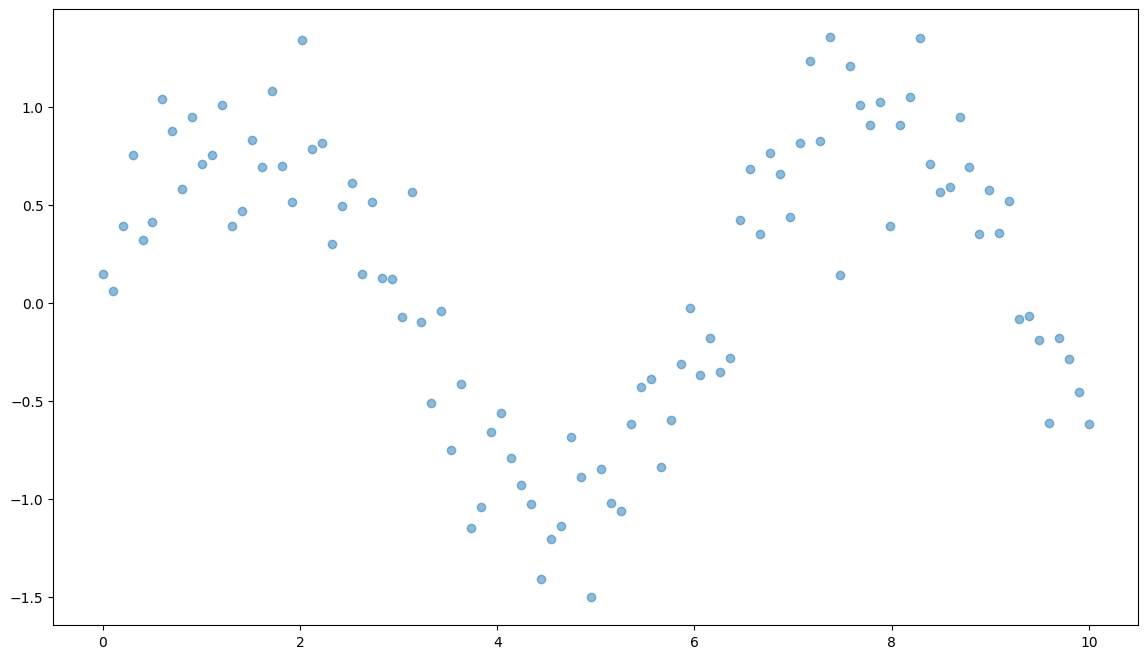

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

# Data
np.random.seed(42)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = np.sin(X).ravel() + np.random.randn(m) * 0.3

# Latih beberapa Decision Tree yang sedikit berbeda (overfitting)
plt.figure(figsize=(14, 8))
plt.scatter(X, y, alpha=0.5, label='Data Aktual')
plt.show()

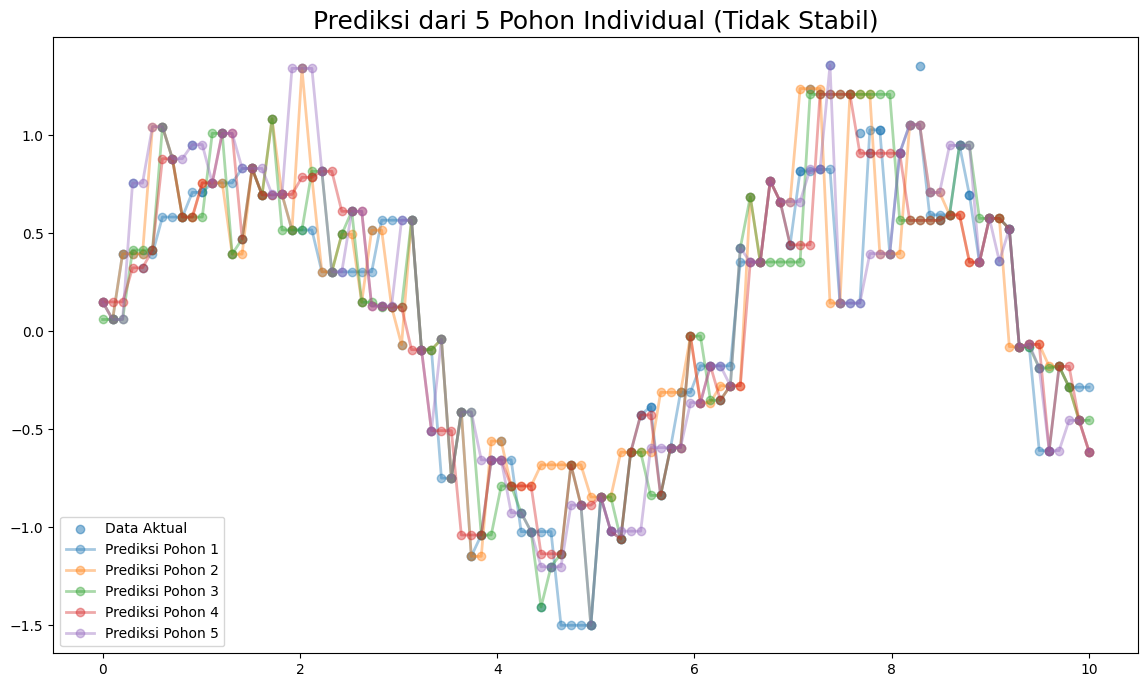

In [4]:
# Latih beberapa Decision Tree yang sedikit berbeda (overfitting)
plt.figure(figsize=(14, 8))
plt.scatter(X, y, alpha=0.5, label='Data Aktual')
# Latih 5 pohon yang berbeda pada subset data yang berbeda
for i in range(5):
    # Ambil subset acak
    indices = np.random.choice(m, size=int(m*0.8), replace=True)
    X_subset, y_subset = X[indices], y[indices]
    
    tree_reg = DecisionTreeRegressor() # Pohon yang tidak dibatasi
    tree_reg.fit(X_subset, y_subset)
    
    y_pred = tree_reg.predict(X)
    plt.plot(X, y_pred, linewidth=2, marker='o', alpha=0.4, label=f'Prediksi Pohon {i+1}')

plt.title("Prediksi dari 5 Pohon Individual (Tidak Stabil)", fontsize=18)
plt.legend()
plt.show()


**Analisis:**

Perhatikan bagaimana setiap pohon individual (garis berwarna) sangat "bergerigi" dan berbeda satu sama lain. Mereka semua overfitting pada subset data mereka masing-masing.

Namun, jika kita mengambil **rata-rata** dari semua garis yang tidak stabil ini, kita akan mendapatkan sebuah kurva yang jauh lebih mulus dan lebih dekat dengan pola sinus yang sebenarnya. Inilah kekuatan dari *ensemble learning*.


### Kesimpulan
* **Ensemble Learning** adalah tentang menggabungkan banyak model lemah untuk menciptakan satu model kuat.
* Kunci keberhasilannya adalah **keragaman** di antara model-model individual.
* **Bagging (seperti Random Forest)** menciptakan keragaman dengan melatih model secara paralel pada subset data yang berbeda.
* **Boosting (seperti Gradient Boosting)** menciptakan keragaman dengan melatih model secara sekuensial, di mana setiap model belajar dari kesalahan model sebelumnya.

**Selanjutnya:**
Di subchapter berikutnya, kita akan menyelami lebih dalam implementasi praktis dari algoritma *ensemble* yang paling populer: **Random Forest Regressor**.
